In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar CSV
csv_path = '../hito-1/hltb_data.csv'
df = pd.read_csv(csv_path, low_memory=False)

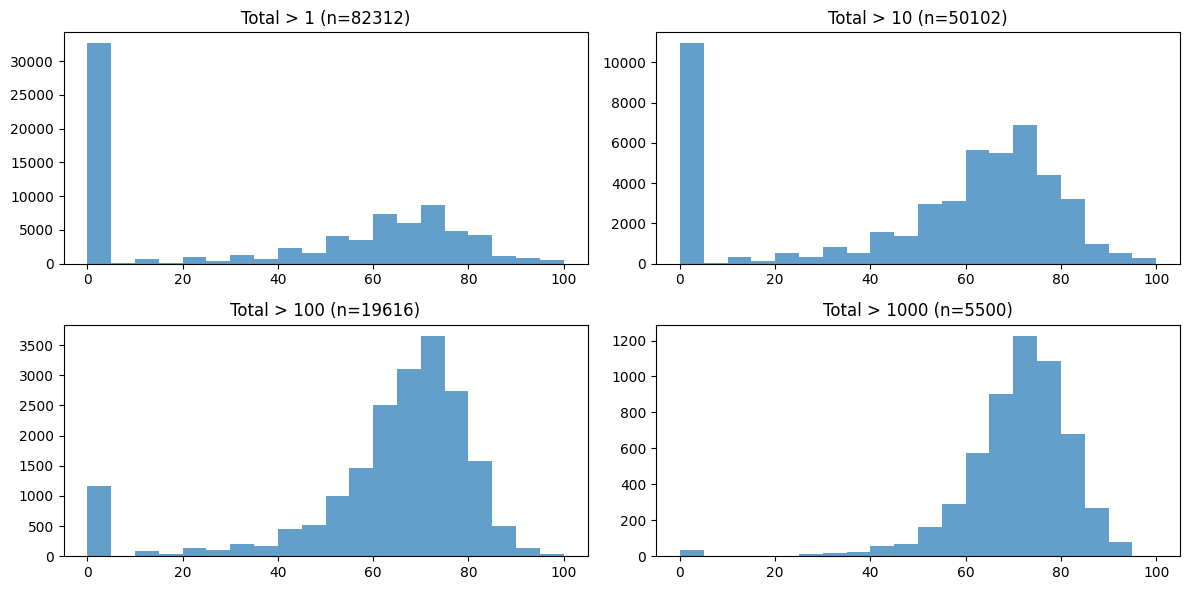

In [2]:
thresholds = [1, 10, 100, 1000]
plt.figure(figsize=(12, 6))
for i, thresh in enumerate(thresholds):
    subset = df[df['game_count_total'] > thresh]['game_review_score']
    plt.subplot(2, 2, i+1)
    plt.hist(subset, bins=20, alpha=0.7)
    plt.title(f'Total > {thresh} (n={len(subset)})')
plt.tight_layout()
plt.show()

In [3]:
df_completion = df[df['game_count_total'] >= 1000][df['game_count_review'] > 5][['game_count_comp', 'game_count_total', 'game_count_retired', 'game_count_replay', 'game_count_review', 'game_review_score']].copy()

df_completion.head()
df_completion.describe(include='all')

/tmp/ipykernel_22375/1070530764.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_completion = df[df['game_count_total'] >= 1000][df['game_count_review'] > 5][['game_count_comp', 'game_count_total', 'game_count_retired', 'game_count_replay', 'game_count_review', 'game_review_score']].copy()


,game_count_comp,game_count_total,game_count_retired,game_count_replay,game_count_review,game_review_score
count,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000
mean,1149.481545,4419.319635,219.053463,45.202055,359.909437,71.464802
std,2253.666663,5322.630213,333.913105,109.655637,657.844411,9.561474
min,10.000000,1000.000000,3.000000,0.000000,6.000000,25.000000
25%,171.000000,1584.750000,56.000000,6.000000,44.000000,66.000000
50%,433.000000,2634.000000,107.000000,15.000000,133.000000,72.000000
75%,1067.000000,4826.250000,242.000000,38.000000,360.000000,78.000000
max,36371.000000,62909.000000,5227.000000,2165.000000,7552.000000,94.000000


In [4]:
# Calcular tasa de abandono (retired rate)
df_completion['retired_rate'] = df_completion['game_count_retired'] / df_completion['game_count_total']

# Calcular tasa de rejuego (replay rate)
df_completion['replay_rate'] = df_completion['game_count_replay'] / df_completion['game_count_total']

df_completion['engagement_score'] = (df['game_count_replay'] + df['game_count_comp']) / (    df['game_count_retired'] + df['game_count_comp'] + df['game_count_replay'])
# Variable objetivo
y = df_completion['game_review_score']

# Variables predictoras
X = df_completion[['retired_rate', 'replay_rate', 'engagement_score']]

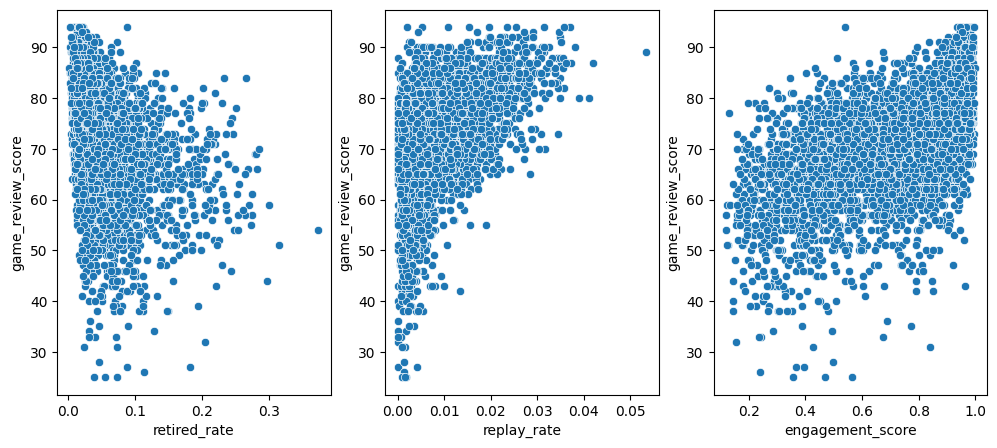

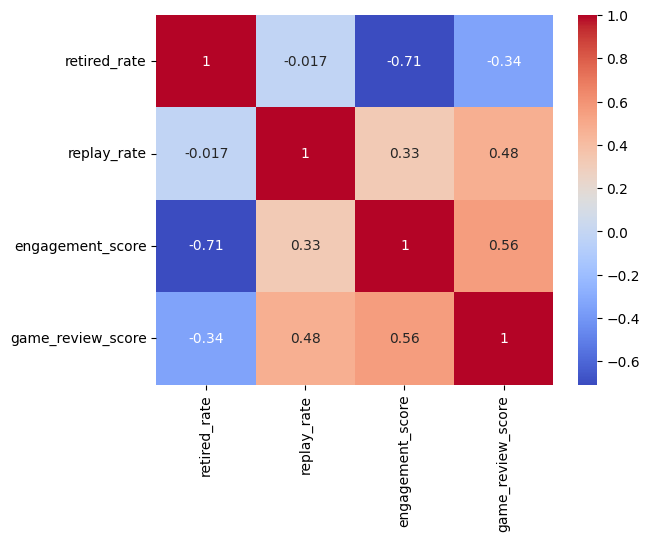

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
sns.scatterplot(x='retired_rate', y='game_review_score', data=df_completion, ax=ax1)
sns.scatterplot(x='replay_rate', y='game_review_score', data=df_completion, ax=ax2)
sns.scatterplot(x='engagement_score', y='game_review_score', data=df_completion, ax=ax3)
plt.show()

# Matriz de correlación
corr_matrix = df_completion[['retired_rate', 'replay_rate', 'engagement_score', 'game_review_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 43)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
r2_reg = r2_score(y_test, predict)
mse_reg = mean_squared_error(y_test, predict)
print(r2_reg)
print(mse_reg)

0.42235950216400275
53.91323979042499


In [8]:
poly = PolynomialFeatures(3)
X2_train = poly.fit_transform(X_train)
X2_test = poly.fit_transform(X_test)

lr2 = LinearRegression()
lr2.fit(X2_train, y_train)
predict2 = lr2.predict(X2_test)
r2_reg2 = r2_score(y_test, predict2)
mse_reg2 = mean_squared_error(y_test, predict2)
print(r2_reg2)
print(mse_reg2)

0.46934525517212233
49.527892540447986


In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
print(r2_rf)
print(mse_rf)

0.40028355721380904
55.97366615969582


In [10]:
poly2 = PolynomialFeatures(3)
X2 = poly2.fit_transform(X)
X2_train2 = poly2.fit_transform(X_train)
X2_test2 = poly2.fit_transform(X_test)

rf2 = RandomForestRegressor()
rf2.fit(X2_train2, y_train)
rf2_pred = rf2.predict(X2_test2)

r2_rf2 = r2_score(y_test, rf2_pred)
mse_rf2 = mean_squared_error(y_test, rf2_pred)
print(r2_rf2)
print(mse_rf2)

0.41290301799307705
54.795847053231945


In [11]:
import pandas as pd

# Crear un diccionario con los valores de error
data = {
    "Modelo": ["Linear Regression", "Polynomial Regression", "Random Forest", "Polynomial + Random Forest"],
    "R2": [r2_reg, r2_reg2, r2_rf, r2_rf2],
    "MSE": [mse_reg, mse_reg2, mse_rf, mse_rf2]
}

# Crear el DataFrame
df_errors = pd.DataFrame(data)

# Mostrar la tabla
print(df_errors)

                       Modelo        R2        MSE
0           Linear Regression  0.422360  53.913240
1       Polynomial Regression  0.469345  49.527893
2               Random Forest  0.400284  55.973666
3  Polynomial + Random Forest  0.412903  54.795847


## Refinamiento pregunta


Primer paso para contrastar resultado, probar el desempeño del mejor modelo con validacion cruzada para probar overfitting


In [12]:
# prueba con validacion cruzada
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr2, X2_train, y_train, cv=12)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean()) 

Cross-validation scores: [0.44258693 0.40296105 0.42206789 0.48923996 0.46161527 0.4492671
 0.47175765 0.51456176 0.52351419 0.53390896 0.4135401  0.41925522]
Mean cross-validation score: 0.46202300754939385


Probar los efectos de cambiar el engagement rate por completion_rate para eliminar colinealidad entre variables

In [13]:
df_completion = df[df['game_count_total'] >= 1500][df['game_count_review'] > 5][['game_count_comp', 'game_count_total', 'game_count_retired', 'game_count_replay', 'game_count_review', 'game_review_score']].copy()

df_completion['retired_rate'] = df_completion['game_count_retired'] / df_completion['game_count_total']

df_completion['replay_rate'] = df_completion['game_count_replay'] / df_completion['game_count_total']

df_completion['completion_rate'] = df_completion['game_count_comp'] / df_completion['game_count_total']

y = df_completion['game_review_score']

X = df_completion[['retired_rate', 'replay_rate', 'completion_rate']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 43)

/tmp/ipykernel_22375/1459929550.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_completion = df[df['game_count_total'] >= 1500][df['game_count_review'] > 5][['game_count_comp', 'game_count_total', 'game_count_retired', 'game_count_replay', 'game_count_review', 'game_review_score']].copy()


In [14]:
modelos = [
    ("Linear Regression", LinearRegression(), None),
    ("Polynomial Regression", LinearRegression(), PolynomialFeatures(4)),
    ("Random Forest", RandomForestRegressor(), None),
    ("Polynomial + Random Forest", RandomForestRegressor(), PolynomialFeatures(3))
]

resultados = []

for nombre, modelo, poly in modelos:
    if poly:
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        modelo.fit(X_train_poly, y_train)
        y_pred = modelo.predict(X_test_poly)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    resultados.append({"Modelo": nombre, "R2": r2, "MSE": mse})

df_errors = pd.DataFrame(resultados)
print(df_errors)

                       Modelo        R2        MSE
0           Linear Regression  0.384297  49.223305
1       Polynomial Regression  0.463353  42.903004
2               Random Forest  0.434411  45.216871
3  Polynomial + Random Forest  0.438291  44.906668


In [15]:
poly = PolynomialFeatures(4)

X2 = poly.fit_transform(X)
X2_train = poly.fit_transform(X_train)
X2_test = poly.fit_transform(X_test)

lr2 = LinearRegression()
lr2.fit(X2_train, y_train)
predict2 = lr2.predict(X2_test)
r2_reg2 = r2_score(y_test, predict2)
mse_reg2 = mean_squared_error(y_test, predict2)

cv_scores = cross_val_score(lr2, X2_train, y_train, cv=12)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean()) 

Cross-validation scores: [0.47240944 0.49700033 0.422951   0.46022723 0.52298918 0.51071024
 0.47455523 0.52226962 0.5251236  0.46792375 0.52017327 0.48708143]
Mean cross-validation score: 0.49028452550869295


Generar una matriz con la cual comparar los efectos del cambio de los thresholds en el score obtenido

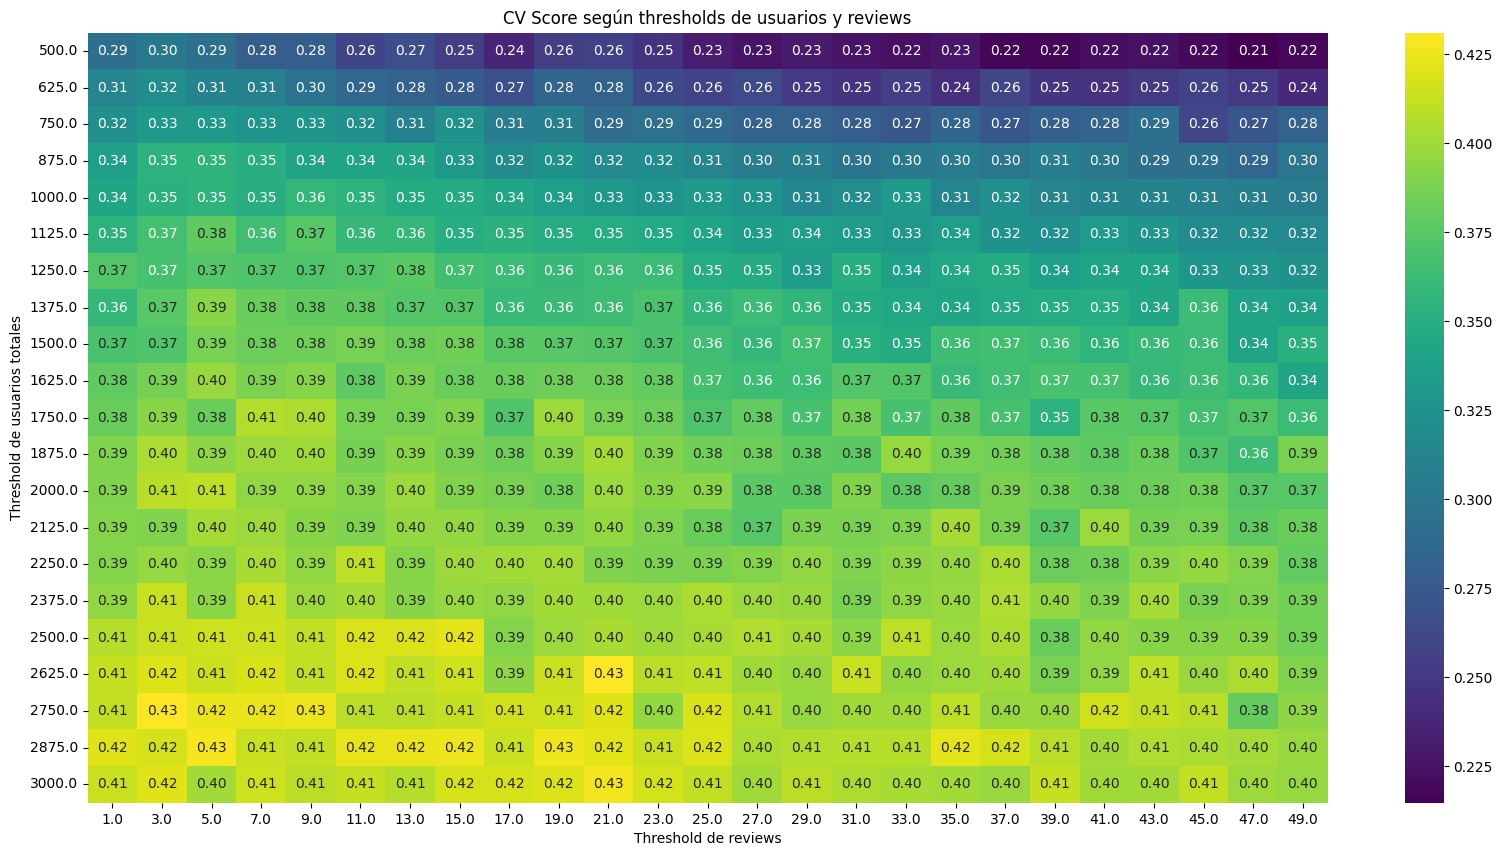

In [16]:
import numpy as np

review_thresholds = range(1, 51, 2)
user_thresholds = range(500, 3001, 125)

results = []

for user_thresh in user_thresholds:
    for review_thresh in review_thresholds:
        df_filtrado = df[(df['game_count_review'] > review_thresh) & (df['game_count_total'] >= user_thresh)].copy()
        df_filtrado['retired_rate'] = df_filtrado['game_count_retired'] / df_filtrado['game_count_total']
        df_filtrado['replay_rate'] = df_filtrado['game_count_replay'] / df_filtrado['game_count_total']
        df_filtrado['completion_rate'] = df_filtrado['game_count_comp'] / df_filtrado['game_count_total']
        X = df_filtrado[['retired_rate', 'replay_rate', 'completion_rate']]
        y = df_filtrado['game_review_score']
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        results.append((user_thresh, review_thresh, cv_scores.mean(), len(df_filtrado)))

# Convertir resultados a array para graficar
results = np.array(results)

# Ejemplo de visualización: heatmap de R²

df_results = pd.DataFrame(results, columns=['user_thresh', 'review_thresh', 'r2', 'n'])
pivot = df_results.pivot(index='user_thresh', columns='review_thresh', values='r2')
plt.figure(figsize=(20,10))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title('CV Score según thresholds de usuarios y reviews')
plt.xlabel('Threshold de reviews')
plt.ylabel('Threshold de usuarios totales')
plt.show()

In [17]:
df_completion = df[df['game_count_total'] >= 1750][df['game_count_review'] > 7][['game_count_comp', 'game_count_total', 'game_count_retired', 'game_count_replay', 'game_count_review', 'game_review_score']].copy()

df_completion['retired_rate'] = df_completion['game_count_retired'] / df_completion['game_count_total']

df_completion['replay_rate'] = df_completion['game_count_replay'] / df_completion['game_count_total']

df_completion['completion_rate'] = df_completion['game_count_comp'] / df_completion['game_count_total']

y = df_completion['game_review_score']

X = df_completion[['retired_rate', 'replay_rate', 'completion_rate']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 43)

/tmp/ipykernel_22375/1916344747.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_completion = df[df['game_count_total'] >= 1750][df['game_count_review'] > 7][['game_count_comp', 'game_count_total', 'game_count_retired', 'game_count_replay', 'game_count_review', 'game_review_score']].copy()


In [18]:
modelos = [
    ("Linear Regression", LinearRegression(), None),
    ("Polynomial Regression", LinearRegression(), PolynomialFeatures(4)),
    ("Random Forest", RandomForestRegressor(), None),
    ("Polynomial + Random Forest", RandomForestRegressor(), PolynomialFeatures(3))
]

resultados = []

for nombre, modelo, poly in modelos:
    if poly:
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        modelo.fit(X_train_poly, y_train)
        y_pred = modelo.predict(X_test_poly)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    resultados.append({"Modelo": nombre, "R2": r2, "MSE": mse})

df_errors = pd.DataFrame(resultados)
print(df_errors)

                       Modelo        R2        MSE
0           Linear Regression  0.383504  54.780103
1       Polynomial Regression  0.506883  43.816956
2               Random Forest  0.472792  46.846208
3  Polynomial + Random Forest  0.477341  46.442015


In [19]:
poly = PolynomialFeatures(4)

X2 = poly.fit_transform(X)
X2_train = poly.fit_transform(X_train)
X2_test = poly.fit_transform(X_test)

lr2 = LinearRegression()
lr2.fit(X2_train, y_train)
predict2 = lr2.predict(X2_test)
r2_reg2 = r2_score(y_test, predict2)
mse_reg2 = mean_squared_error(y_test, predict2)

cv_scores = cross_val_score(lr2, X2_train, y_train, cv=12)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean()) 

Cross-validation scores: [0.49684151 0.5346947  0.44642045 0.52541689 0.44668492 0.51563942
 0.46006677 0.44643409 0.52269675 0.49102575 0.52189402 0.48442716]
Mean cross-validation score: 0.4910202034686149


Finalmente probar los efectos que tiene usar modelos alternativos como Gradient Boosting

In [20]:
# Prueba con gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
# Calcular métricas de error para Gradient Boosting
r2_gb = gb_reg.score(X_test, y_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(r2_gb)
print(mse_gb)


0.49248336696951156
45.09648119824525


In [21]:
# prueba con validacion cruzada
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(gb_reg, X_train, y_train, cv=12)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean()) 

Cross-validation scores: [0.48684889 0.57513942 0.45756529 0.52704583 0.46697613 0.48236399
 0.43940226 0.47598183 0.54940476 0.50830226 0.51482578 0.52775532]
Mean cross-validation score: 0.5009676457959541


Optimizar los parametros del modelo

In [22]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 75, 100, 125],
    'learning_rate': [0.075, 0.1, 0.125],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 7]
}
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

Best parameters: {'learning_rate': 0.125, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 39.8620879189196


In [23]:
gb_reg = GradientBoostingRegressor(n_estimators=75, learning_rate=0.1, max_depth=3, min_samples_split=5)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
cv_scores = cross_val_score(gb_reg, X_train, y_train, cv=12)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean()) 

Cross-validation scores: [0.48666393 0.57644754 0.46071413 0.52993456 0.46428064 0.47942905
 0.44332887 0.47189274 0.55276497 0.50797011 0.51906304 0.53000522]
Mean cross-validation score: 0.5018745683062812


Obtener metricas finales

In [25]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
gb_reg = GradientBoostingRegressor(n_estimators=75, learning_rate=0.1, max_depth=3, min_samples_split=5)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
# Calcular métricas de error para Gradient Boosting
r2_gb = gb_reg.score(X_test, y_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = root_mean_squared_error(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
print(r2_gb)
print(mse_gb)
print(rmse_gb)
print(mae)

0.49254524181666726
45.090983175717916
6.7149819937002
5.1288244059372605


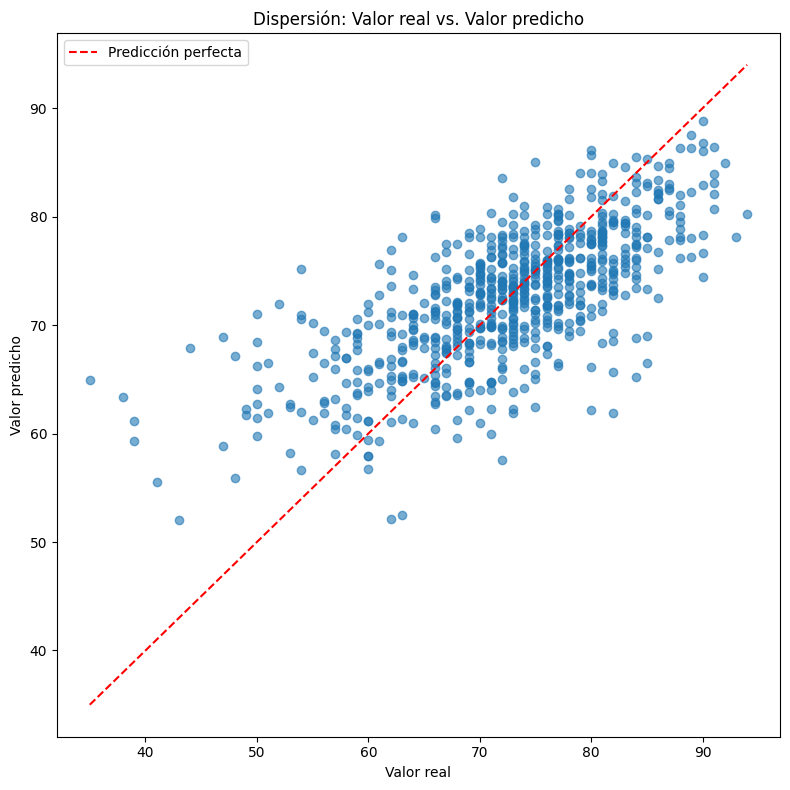

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Predicción perfecta')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Dispersión: Valor real vs. Valor predicho')
plt.legend()
plt.tight_layout()
plt.show()